## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter #used for formating plot ylabel.

## Data Exploration

In [2]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

In [3]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


In [4]:
df.tail()

,DATE,TAG,POSTS
2477,2023-06-01 00:00:00,php,2020
2478,2023-06-01 00:00:00,python,11725
2479,2023-06-01 00:00:00,r,2710
2480,2023-06-01 00:00:00,ruby,229
2481,2023-06-01 00:00:00,swift,1163


In [5]:
# Checking how many rows and how many columns there are. 
#What are the dimensions of the dataframe?
df.shape

(2482, 3)

In [6]:
#Counting the number of entries in each column of the dataframe.
df.count()

DATE     2482
TAG      2482
POSTS    2482
dtype: int64

In [7]:
# Calculating the total number of post per language.
# Which Programming language has had the highest total number of posts of all time?

df_asc = df.groupby('TAG').agg({'POSTS': 'sum'}).reset_index().sort_values(by="POSTS", ascending=False)
df_asc

,TAG,POSTS
7,javascript,2498146
10,python,2141741
6,java,1898827
2,c#,1594301
9,php,1458594
3,c++,795196
11,r,492163
1,c,397157
13,swift,327910
12,ruby,228028


In [8]:
difference = df_asc.at[7, 'POSTS'] - df_asc.at[10, 'POSTS']
difference

356405

Notably, despite Python's rise, JavaScript maintained its overall lead with 356,405 more posts in total compared to Python, securing its position as the most discussed language.

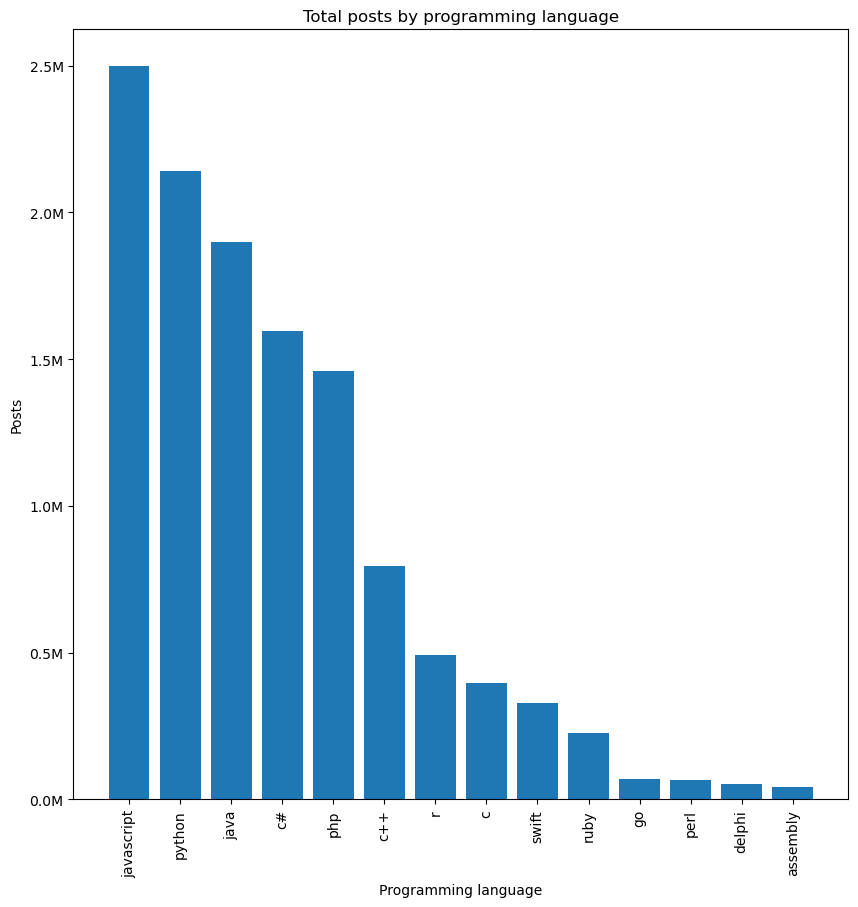

In [9]:
#bar plot to show total posts for each programming language.

x=df_asc["TAG"]
y=df_asc["POSTS"]

fig, ax = plt.subplots(figsize=(10,10))
ax.bar(x,y)

ax.set(title="Total posts by programming language",
       xlabel="Programming language",
      ylabel = "Posts")

#formatting y label.
def millions_formatter(x, pos):
    return f'{x/1000000:.1f}M'
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.xticks(df_asc["TAG"], rotation=90)

plt.show();

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

How many months of data exist per language? Which language had the fewest months with an entry? 


In [10]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,179,179
c,179,179
c#,180,180
c++,179,179
delphi,179,179
go,164,164
java,179,179
javascript,179,179
perl,179,179


## Data Cleaning

Let's fix the date format to make it more readable. Let's change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [11]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [12]:
print(pd.to_datetime(df.DATE[1]))
type(pd.to_datetime(df.DATE[1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [13]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation



Reshaping and creating new dataframe? Checking how many rows and columns does it have? Printing out the column names and also the first 5 rows of the dataframe.

In [14]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

In [15]:
reshaped_df.shape

(180, 14)

In [16]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [17]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1641.0,754.0,104.0,NaN,1129.0,634.0,130.0,475.0,537.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,956.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN


In [18]:
#Count the number of entries per programming language. The number of entries had changed.
reshaped_df.count()

TAG
assembly      179
c             179
c#            180
c++           179
delphi        179
go            164
java          179
javascript    179
perl          179
php           179
python        179
r             177
ruby          179
swift         171
dtype: int64

In [19]:
#Replace all NaN values with 0.
reshaped_df.fillna(0, inplace=True)

In [20]:
reshaped_df = reshaped_df.fillna(0)

In [21]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1641.0,754.0,104.0,0.0,1129.0,634.0,130.0,475.0,537.0,6.0,287.0,0.0
2008-10-01,16.0,302.0,1988.0,807.0,112.0,0.0,1149.0,722.0,128.0,610.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1731.0,734.0,141.0,0.0,956.0,580.0,97.0,499.0,449.0,1.0,157.0,0.0


In [22]:
#Just checking for any NaN values again.
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


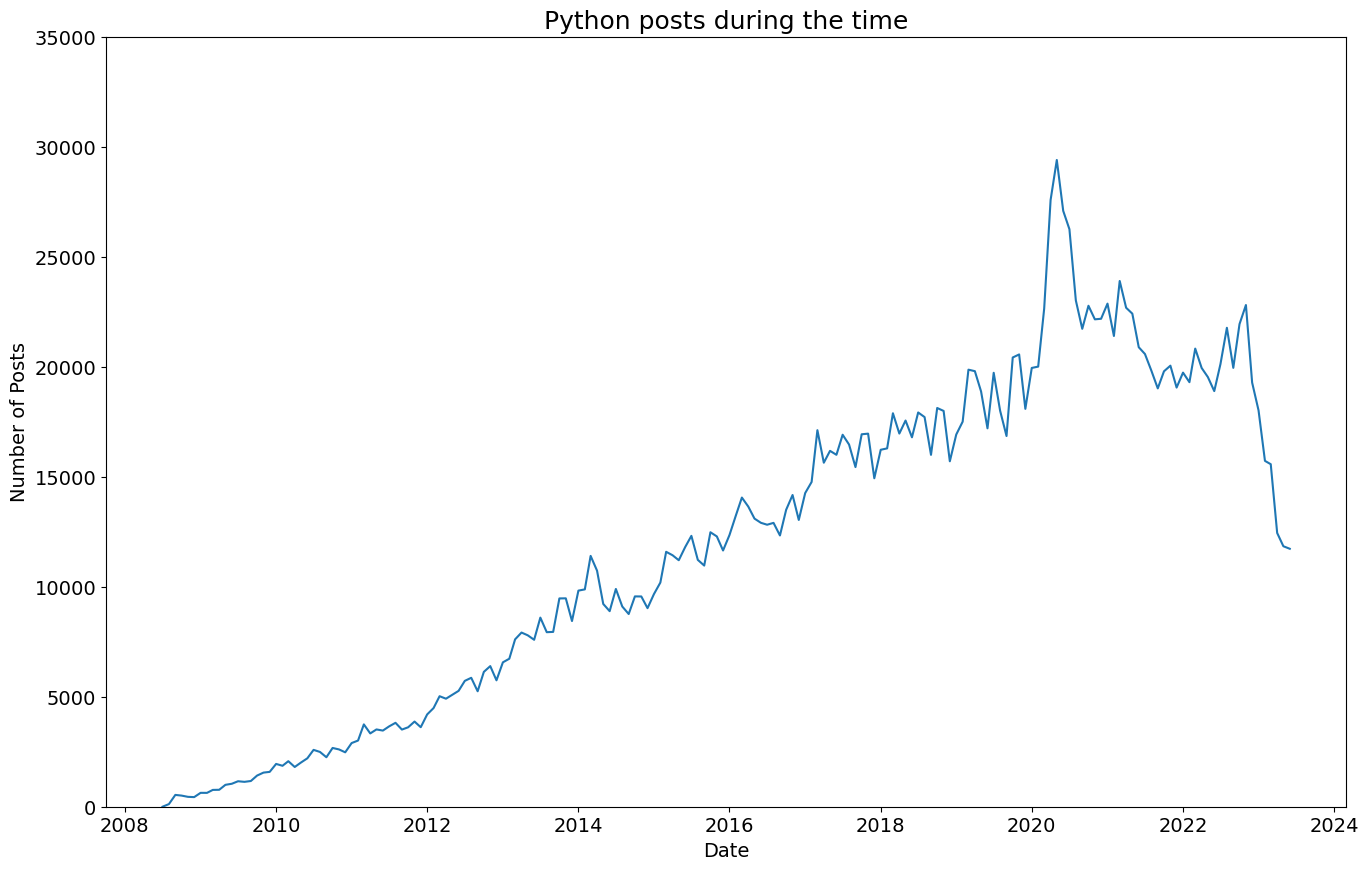

In [23]:
#Shoing a single programming language (e.g., python) on a chart.
plt.figure(figsize=(16,10))  # changing size of the chart
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title("Python posts during the time", fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)

plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.python);

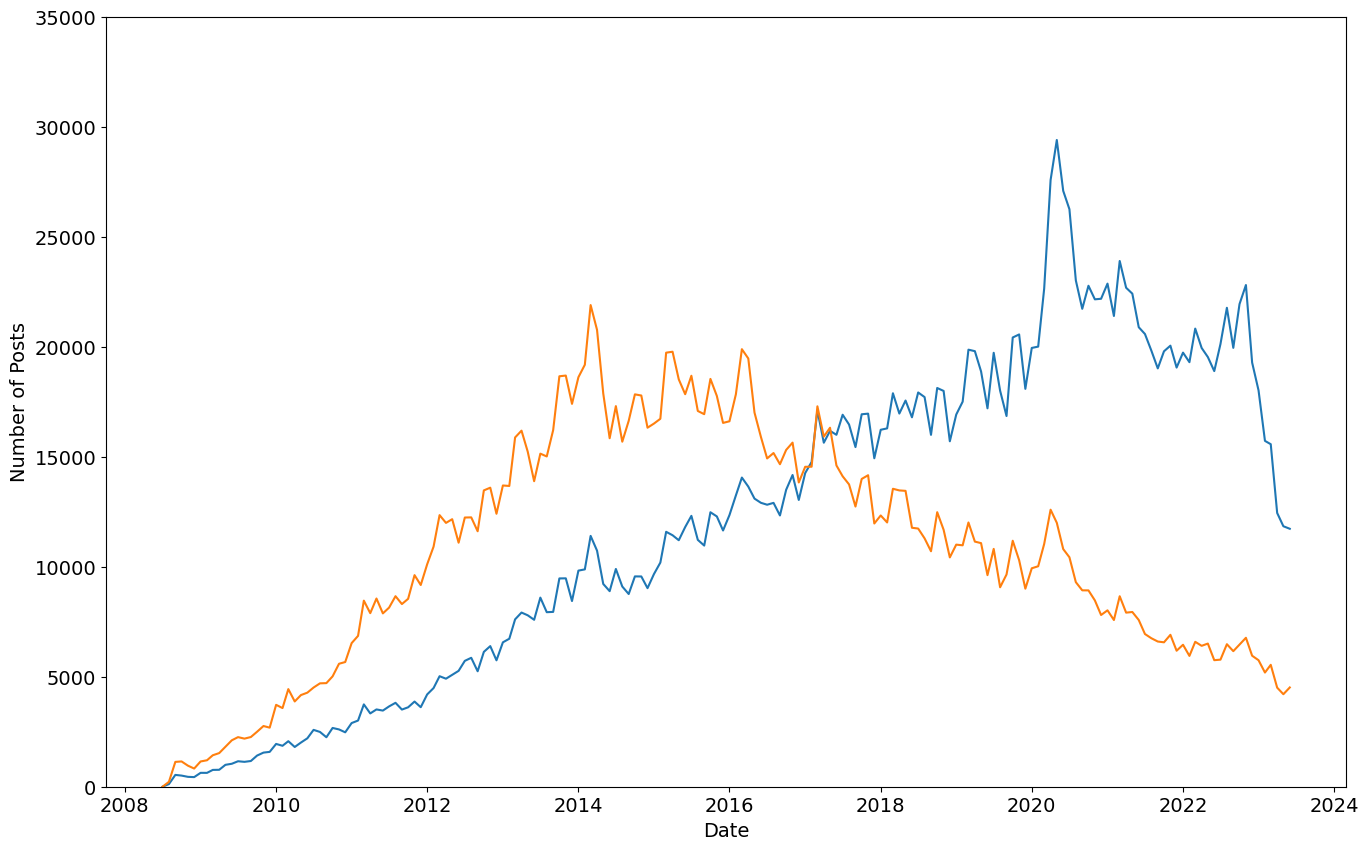

In [24]:
#two lines (e.g. for Java and Python) on the same chart.

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

plt.plot(reshaped_df.index, reshaped_df.python)
plt.plot(reshaped_df.index, reshaped_df.java);

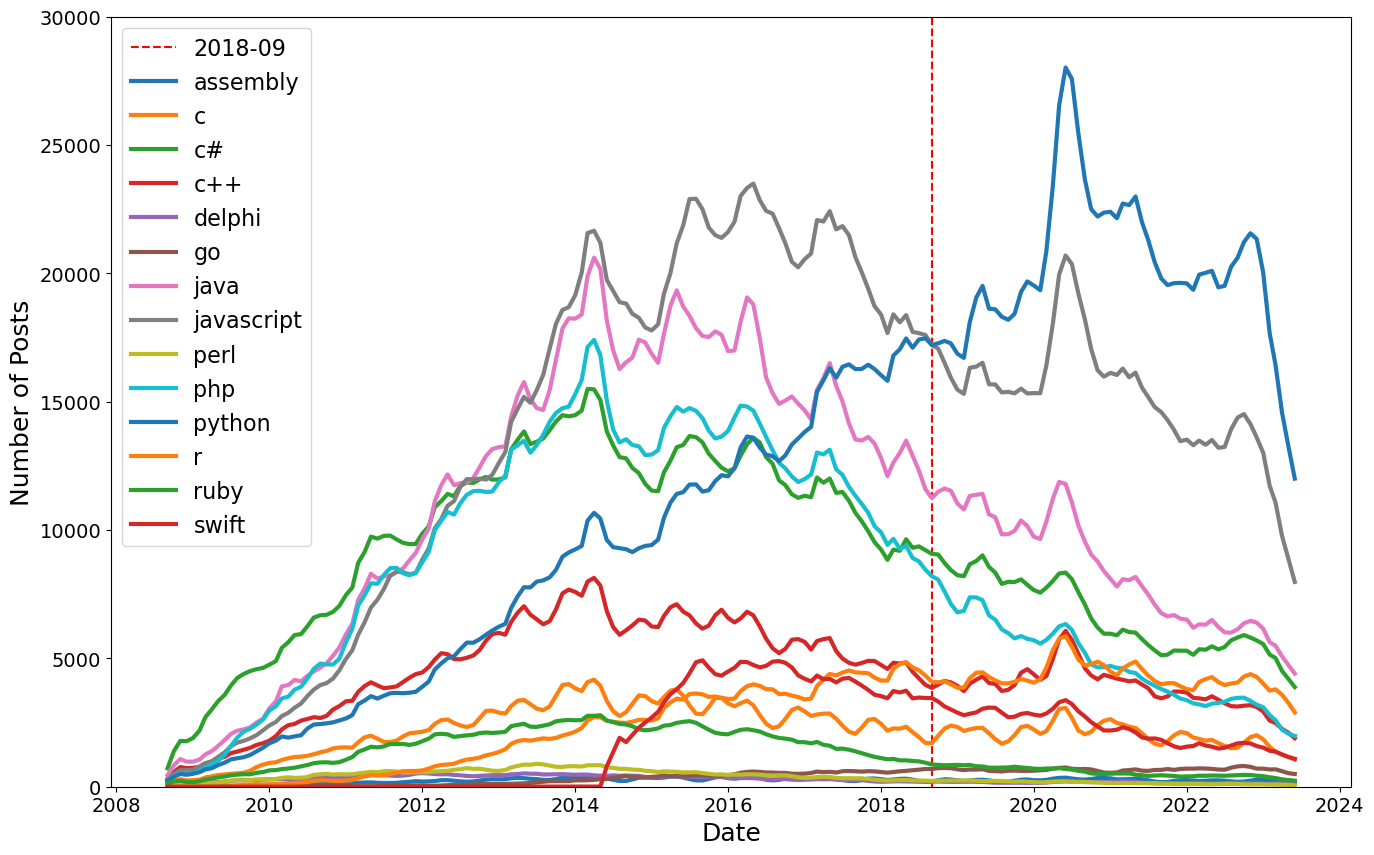

In [25]:
roll_df = reshaped_df.rolling(window=3).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of Posts', fontsize=18)
plt.ylim(0, 30000)

#add vertical line to show the Python overtaking date.
plt.axvline(pd.to_datetime('2018-09-01'), color='red', linestyle='--', label='2018-09')

for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column],
           linewidth=3, label=roll_df[column].name)
  
plt.legend(fontsize=16);

The summary provides a comprehensive view of the programming language trends, highlighting Python's ascendancy over JavaScript by the end of 2018 and its subsequent peak in mid-2020. However, both Python and other language-related posts experienced a significant decline afterward, potentially influenced by the emergence of ChatGPT.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

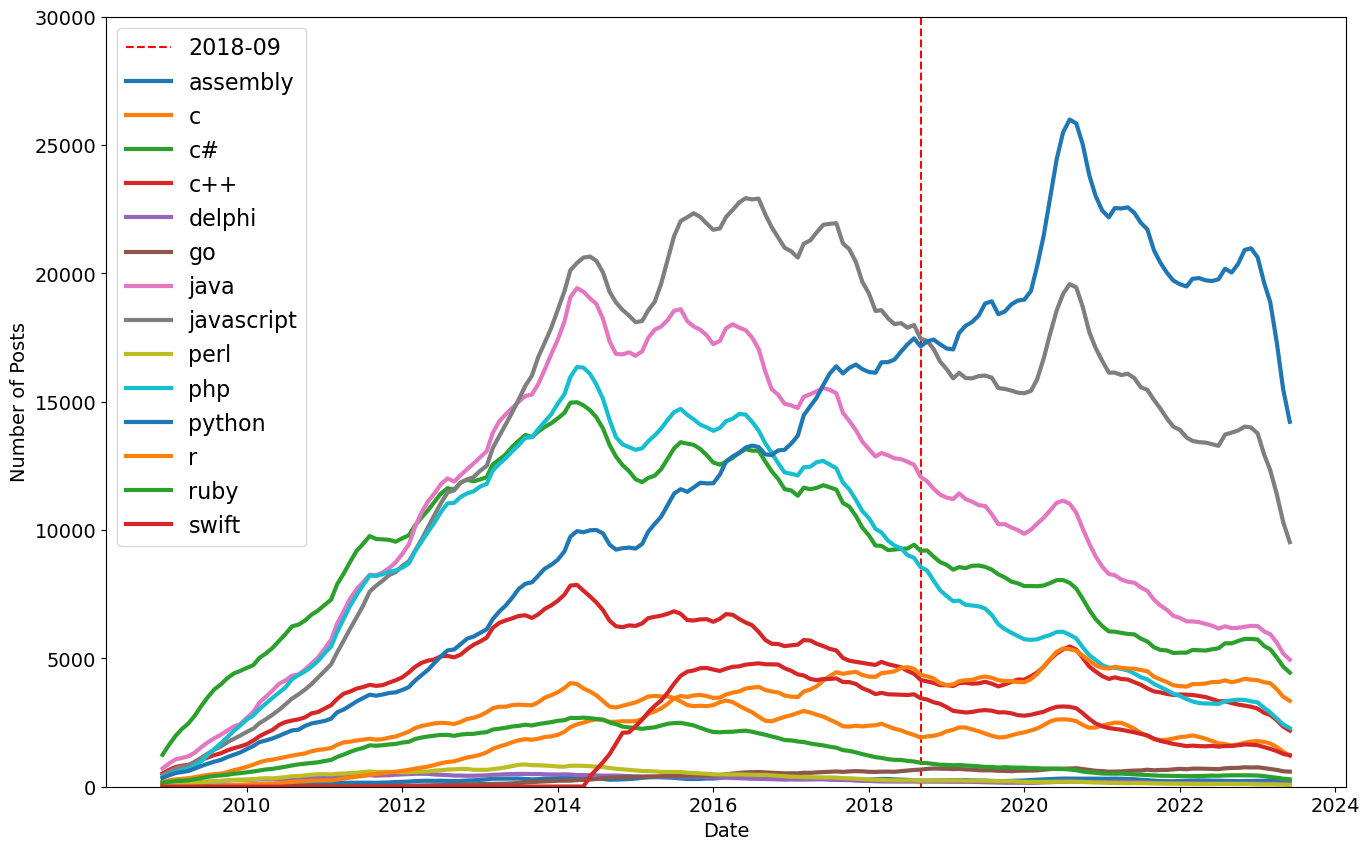

In [26]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 30000)

#add vertical line to show the Python overtaking date.
plt.axvline(pd.to_datetime('2018-09-01'), color='red', linestyle='--', label='2018-09')

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16);